**LOAD THE DATASET**

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/fashion_products.csv')

# Preview the first 5 rows
print(df.head())

# Check shape and basic info
print(df.shape)
print(df.info())


   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  
(1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   obj

**CLEANING THE DATASET**

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check data types
print("\nData types:\n", df.dtypes)


Missing values:
 User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

Number of duplicate rows: 0

Data types:
 User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object


In [6]:
# Drop 'User ID' column
df_cleaned = df.drop(columns=['User ID'])

# Confirm the change
df_cleaned.head()


,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


**PERFORM EXPLORATORY DATA ANALYSIS**

/tmp/ipython-input-7-2424440107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")


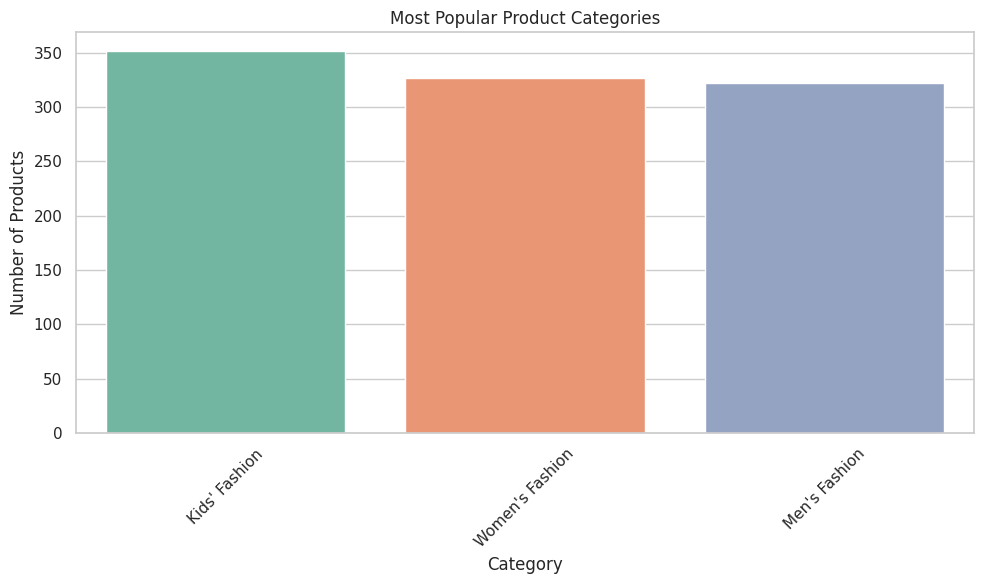

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count of products per category
category_counts = df_cleaned['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")
plt.title("Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of Product Prices**

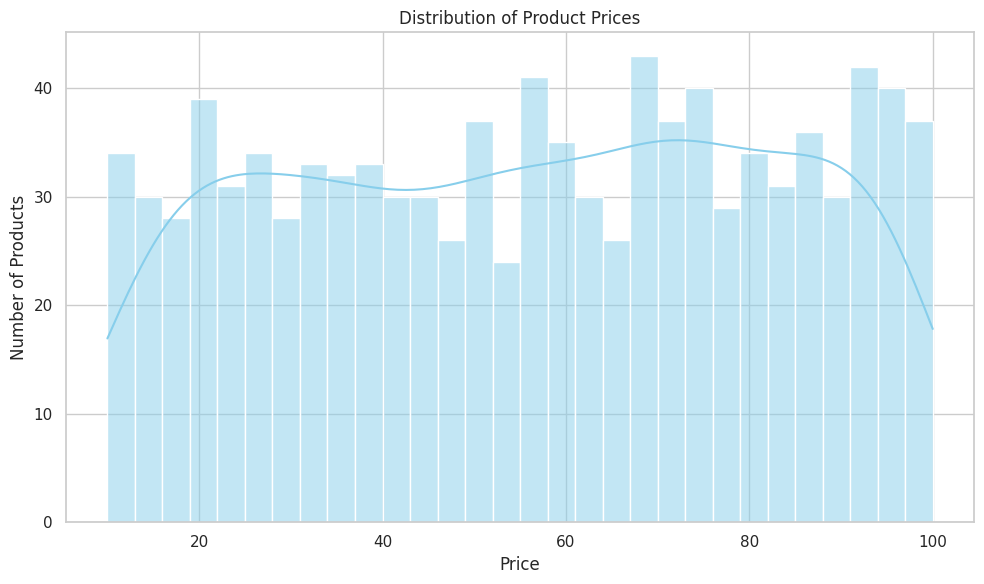

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


**Distribution of Product Ratings**

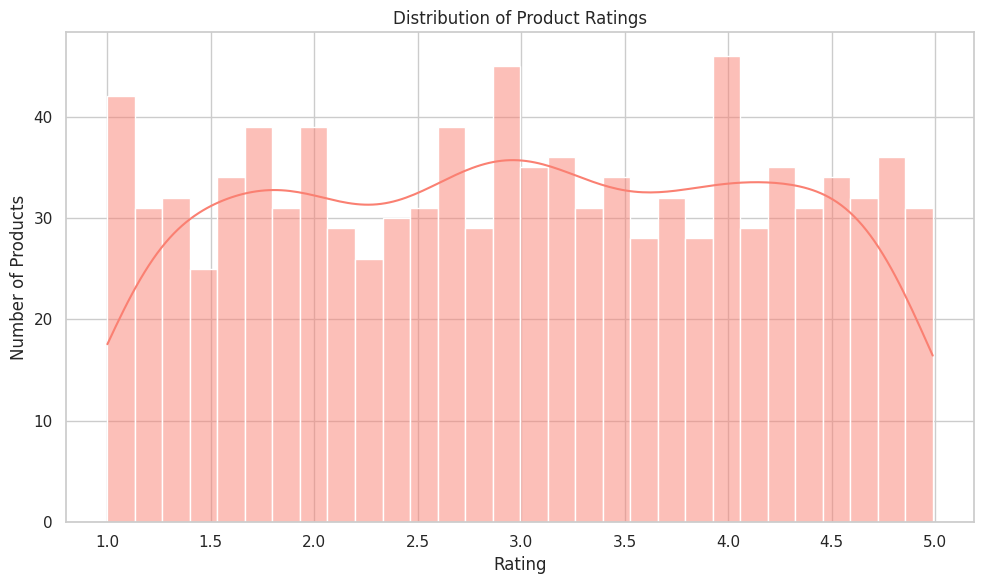

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Rating'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


**Top 10 Brands by Product Listings**

/tmp/ipython-input-10-3743857580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="pastel")


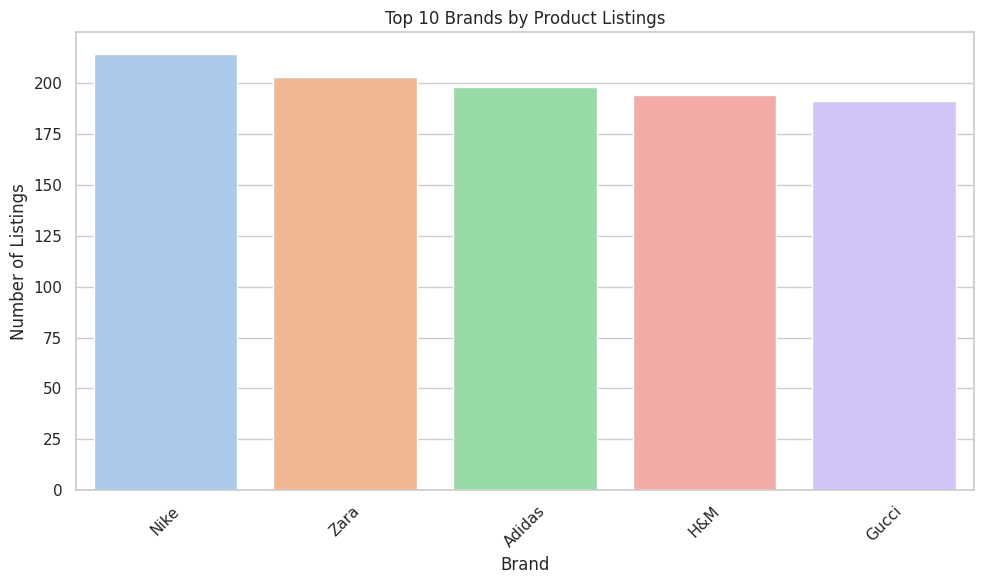

In [10]:
# Top 10 brands by number of products
top_brands = df_cleaned['Brand'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="pastel")
plt.title("Top 10 Brands by Product Listings")
plt.xlabel("Brand")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Price vs Rating by Category**

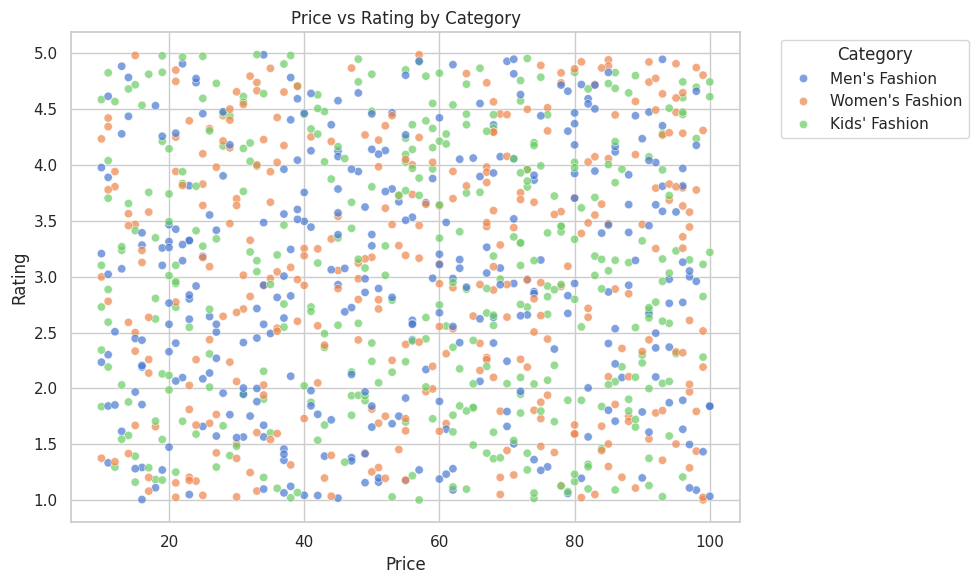

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Price', y='Rating', hue='Category', palette='muted', alpha=0.7)
plt.title("Price vs Rating by Category")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Average Rating by Product Color**

/tmp/ipython-input-14-1001885087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Color', y='Rating', data=color_rating, palette='coolwarm')


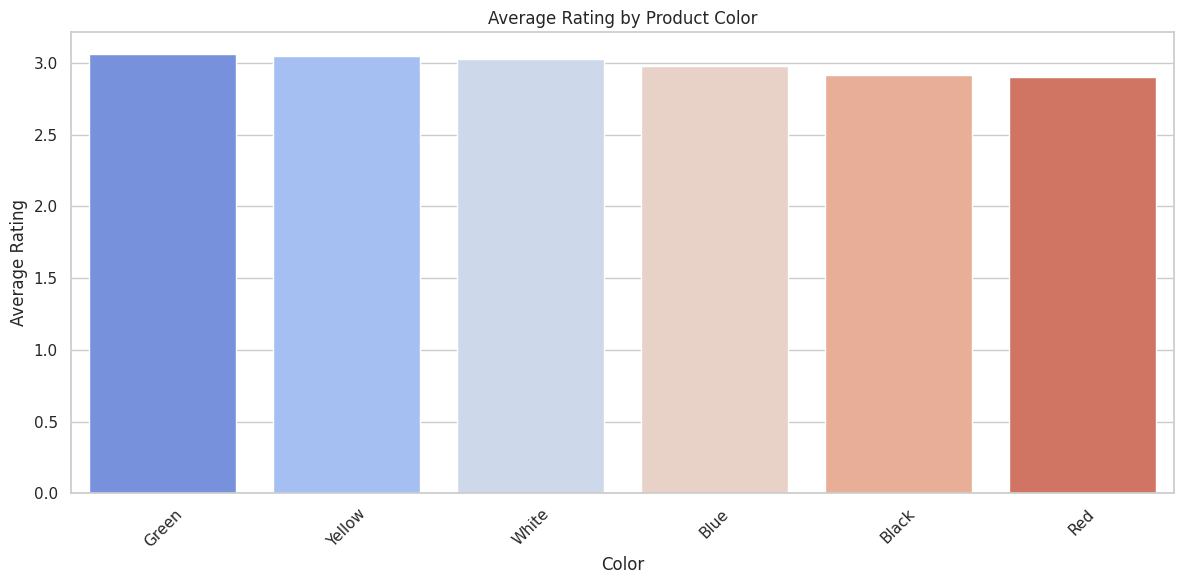

In [14]:
# Group by Color
color_rating = df_cleaned.groupby('Color')['Rating'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='Rating', data=color_rating, palette='coolwarm')
plt.title('Average Rating by Product Color')
plt.xlabel('Color')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Top 5 Affordable Brands with Avg Rating ≥ 3.0**

/tmp/ipython-input-19-196431198.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_affordable, x='Brand', y='Price', palette='Greens_d')


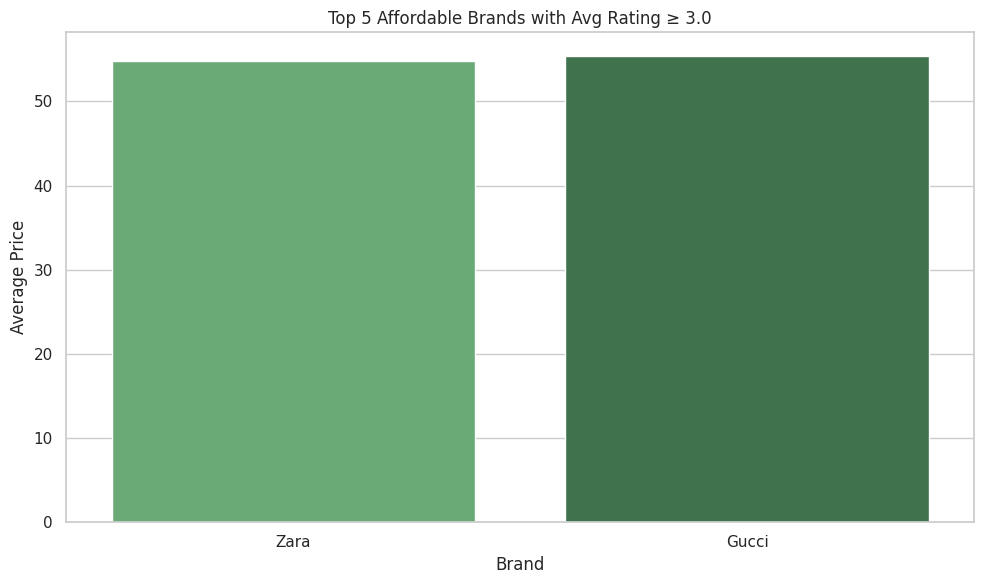

   Brand      Price    Rating
4   Zara  54.748768  3.001594
1  Gucci  55.429319  3.162277


In [19]:
# Group by Brand and calculate average Price and Rating
brand_stats = df_cleaned.groupby('Brand').agg({'Price': 'mean', 'Rating': 'mean'}).reset_index()

# Filter: Rating >= 4.0
filtered = brand_stats[brand_stats['Rating'] >= 3.0]

# Check if any brands meet the criteria
if not filtered.empty:
    # Get 5 cheapest high-rated brands
    top_5_affordable = filtered.sort_values(by='Price').head(5)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_5_affordable, x='Brand', y='Price', palette='Greens_d')
    plt.title('Top 5 Affordable Brands with Avg Rating ≥ 3.0')
    plt.xlabel('Brand')
    plt.ylabel('Average Price')
    plt.tight_layout()
    plt.show()

    # Print data
    print(top_5_affordable)

else:
    print("⚠️ No brands found with an average rating ≥ 3.0.")
